<a href="https://colab.research.google.com/github/andindewi/folium_project_n3ts/blob/main/Andin_Dewi_Juliyanti_X_3_Kupang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Template Tugas Project

1. import folium, pandas, geopandas, dan drive.
2. load data shapefile, pilih kota/kabupaten yang akan dianalisis
3. load data csv dan proses merge/join data
4. load peta choropleth

In [1]:
# Import Library

import folium
import pandas as pd
import geopandas as gpd
from google.colab import drive

Pilih nama kota / kabupaten kalian. jika tidak muncul pastikan namanya sesuai dengan nama di link berikut :
https://geoservices.big.go.id/portal/apps/webappviewer/index.html?id=cb58db080712468cb4bfd408dbde3d70

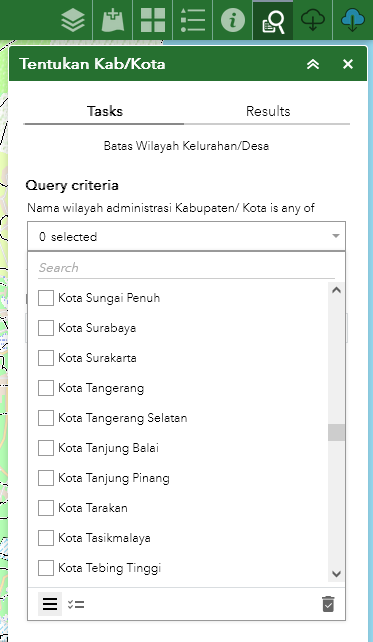

In [2]:
# Read Data Shapefile

drive.mount('/content/drive')

# Shapefile Admin Indonesia (tidak usah diubah2) Warning! File besar 1.4gb
indonesia_admin = gpd.read_file('/content/drive/MyDrive/ADMIN_INDO/ADMINISTRASI_AR_DESAKEL_10K.shp')

# Pilih Kota/Kabupaten yang ingin ditampilkan, contoh 'Kota Tangerang Selatan'
aoi_admin = indonesia_admin[indonesia_admin['WADMKK'] == 'Kota Kupang']

Mounted at /content/drive


In [3]:
# CSV file path
csv_path = '/content/drive/MyDrive/kupang_kk.csv'

# Read shapefile
admin_gdf = aoi_admin

# Read CSV data
csv_data = pd.read_csv(csv_path)

print(csv_data.head())
print(admin_gdf.head())
# Convert column names to lowercase
csv_data['Kelurahan'] = csv_data['Kelurahan'].str.lower().str.replace(' ', '')
admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.lower().str.replace(' ', '')
#csv_data['jumlah penduduk'] = csv_data['jumlah penduduk'].astype(str).str.replace('.', '')
#csv_data['jumlah penduduk'] = pd.to_numeric(csv_data['jumlah penduduk'])

# Fix typo to merge properly
#admin_gdf['NAMOBJ'] = admin_gdf['NAMOBJ'].str.replace('pondokjagungt', 'pondokjagung')
#csv_data['Kelurahan'] = csv_data['Kelurahan'].str.replace('perigibaru', 'parigibaru')

# Merge data
merged_data = pd.merge(admin_gdf, csv_data, left_on='NAMOBJ', right_on='Kelurahan', how='left')

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged_data, geometry=merged_data.geometry)

print(merged_gdf.head())
# Now you can use merged_gdf for further analysis and visualization

    Kelurahan  jumlah penduduk
0      NAIONI             3038
1  MANULAI II             7802
2    BATUPLAT             6092
3        ALAK             9945
4   MANUTAPEN             8681
       OBJECTID        NAMOBJ       FCODE REMARK  \
25965   25966.0       Airmata  BA03070040   None   
25966   25967.0       Airnona  BA03070040   None   
26033   26034.0      Bakunase  BA03070040   None   
26034   26035.0  Bakunase Dua  BA03070040   None   
26105   26106.0     Batu Plat  BA03070040   None   

                                           METADATA     SRS_ID KDBBPS KDCBPS  \
25965  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
25966  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
26033  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
26034  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   
26105  TASWIL1000020230928_DATA_BATAS_DESAKELURAHAN  SRGI 2013   None   None   

         KDCPUM KDEB

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
# Create a base map
m = folium.Map(location=[-10.174951,123.6147184], zoom_start=11)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name='choropleth',
    data=merged_gdf,
    columns=["Kelurahan", "jumlah penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="jumlah penduduk"
).add_to(m)

jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='jumlah penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['WADMKD','jumlah penduduk'],
        aliases=['Kelurahan','jumlah penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

In [6]:
# Create a base map
m = folium.Map(location=[-10.174951,123.6147184], zoom_start=13)

# Create a choropleth map
choropleth = folium.Choropleth(
    geo_data=merged_gdf,
    name="Jumlah KK Kelurahan Kupang",
    data=merged_gdf,
    columns=["Kelurahan", "jumlah penduduk"],
    key_on= "feature.properties.NAMOBJ",
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="jumlah penduduk"
).add_to(m)

# Create/import data sma
data_sma = pd.read_csv('sma_kupang.csv')

data_sma['geometry'] = gpd.GeoSeries.from_wkt(data_sma['WKT'])

# Extract latitude and longitude from Point geometries
data_sma['latitude'] = data_sma['geometry'].apply(lambda x: x.y)
data_sma['longitude'] = data_sma['geometry'].apply(lambda x: x.x)

# Add markers to the map
# Create a marker layer
marker_layer = folium.FeatureGroup(name="SMAN Kupang")

# Add markers to the layer
for i in range(0, len(data_sma)):
    folium.Marker([data_sma.iloc[i]['latitude'], data_sma.iloc[i]['longitude']], popup=data_sma.iloc[i]['nama']).add_to(marker_layer)

m.add_child(marker_layer)

# Add Jumlah_KK layer map
jumlah_KK = folium.GeoJson(
    data=merged_gdf,
    name='jumlah penduduk',
    style_function=lambda feature: {'fillOpacity': 0, 'color': 'transparent'},
    popup = folium.GeoJsonPopup(
        fields=['NAMOBJ','jumlah penduduk'],
        aliases=['Kelurahan','jumlah penduduk']
    )
).add_to(choropleth)

folium.LayerControl().add_to(m)


m

Analysis Question:
Kelurahan mana yang memiliki jumlah KK dengan kelas tertinggi (Merah Tua)?

Jawab: oesapa

Kelurahan apa saja yang tidak terdapat Sekolah Negeri?

Jawab:

1. manulai
2. ⁠namosairi
3. ⁠penkaseoeleta
4. ⁠batuplat
5. ⁠fatukoa
6. ⁠naioni
7. ⁠bello
8. ⁠nunbaundelha
9. ⁠nunhila
10. ⁠fatufeto
11. ⁠airmata
12. ⁠mantasi
13. ⁠manutapen
14. ⁠lai lai bisi kopan
15. ⁠fontein
16. ⁠solor
17. ⁠merdeka
18. ⁠oeba
19. ⁠nunleu
20. ⁠airnona
21. ⁠naikoten dua
22. ⁠bakunase
23. ⁠kuanino
24. ⁠naikotensatu
25. ⁠naikolan
26. ⁠oepura
27. ⁠maulafa
28. ⁠naimata
29. ⁠liliba
30. ⁠tuakdaunmerah
31. ⁠oesapaselatan
32. ⁠lasiana
33. ⁠oesapabarat
34. ⁠penfui
35. ⁠pasir panjang
36. ⁠nefonaek
37. ⁠fatubesi